# Exploring Sleep Data

In [1]:
import pandas as pd
import numpy as np
from cmath import rect, phase
from math import radians, degrees, isnan
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# init sleep_df
filename = 'data/AutoSleep-20201220-to-20231002.csv'
sleep_df = pd.read_csv(filename, parse_dates=['bedtime', 'waketime'])
sleep_index = pd.to_datetime(sleep_df['ISO8601'], utc=True).dt.strftime('%Y-%m-%d').to_numpy()
sleep_df.index = sleep_index
print(sleep_df.info(verbose=False))
sleep_df.head()

# print(sleep_df.columns)
# sleep_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 2021-01-01 to 2023-10-01
Columns: 35 entries, ISO8601 to notes
dtypes: datetime64[ns](2), float64(20), int64(1), object(12)
memory usage: 257.6+ KB
None


,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,sessions,asleep,...,sleepHRV,sleepHRVAvg7,SpO2Avg,SpO2Min,SpO2Max,respAvg,respMin,respMax,tags,notes
2021-01-01,2021-01-01T21:59:59+01:00,"Thursday, Dec 31, 2020","Friday, Jan 1, 2021",2020-12-31 09:11:26,2020-12-31 17:30:00,08:18:33,00:18:33,00:18:33,1,08:00:00,...,43.0,55.0,94.5,90.0,98.0,NaN,NaN,NaN,NaN,NaN
2021-01-02,2021-01-02T21:59:59+01:00,"Friday, Jan 1, 2021","Saturday, Jan 2, 2021",2021-01-01 09:42:00,2021-01-01 17:03:00,07:21:00,00:00:00,00:00:00,1,07:21:00,...,46.0,53.0,93.7,92.0,96.0,NaN,NaN,NaN,NaN,NaN
2021-01-03,2021-01-03T21:59:59+01:00,"Saturday, Jan 2, 2021","Sunday, Jan 3, 2021",2021-01-02 07:11:00,2021-01-02 17:20:00,10:09:00,01:09:00,00:00:00,1,09:00:00,...,61.0,51.0,92.6,87.0,96.0,NaN,NaN,NaN,NaN,NaN
2021-01-04,2021-01-04T21:59:59+01:00,"Sunday, Jan 3, 2021","Monday, Jan 4, 2021",2021-01-03 08:30:10,2021-01-03 19:00:00,10:29:49,00:00:49,00:00:49,1,10:29:00,...,62.0,53.0,92.7,85.0,98.0,NaN,NaN,NaN,NaN,NaN
2021-01-05,2021-01-05T21:59:59+01:00,"Monday, Jan 4, 2021","Tuesday, Jan 5, 2021",2021-01-04 09:09:00,2021-01-04 17:31:00,08:22:00,00:52:00,00:00:00,1,07:30:00,...,61.0,52.0,96.5,93.0,99.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# init and filter: rem_df -> filt_rem_df
filename = 'data/AutoSleep-20230613-to-20231002.csv'
rem_df = pd.read_csv(filename, parse_dates=['bedtime', 'waketime'])
rem_index = pd.to_datetime(rem_df['ISO8601'], utc=True).dt.strftime('%Y-%m-%d').to_numpy()
rem_df.index = rem_index
filt_rem_df = rem_df.loc[rem_df['REM'].notnull()]
print(filt_rem_df.info(verbose=False))
# print(filt_rem_df.columns)
# filt_rem_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 2023-06-15 to 2023-10-01
Columns: 35 entries, ISO8601 to notes
dtypes: datetime64[ns](2), float64(18), int64(3), object(12)
memory usage: 27.8+ KB
None


In [4]:
# merged sleep_df and filt_rem_df into merged_df
merged_df = sleep_df.copy()

on = filt_rem_df.columns.intersection(sleep_df.columns).to_list()
others = filt_rem_df.columns.difference(sleep_df.columns).to_list()
for o in others:
    merged_df[o] = ''

merged_df.loc[sleep_df.index.isin(filt_rem_df.index), on] = filt_rem_df
merged_df.loc[sleep_df.index.isin(filt_rem_df.index), others] = filt_rem_df
print(merged_df.info(verbose=False))
# print(merged_df.columns)
# merged_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 2021-01-01 to 2023-10-01
Columns: 37 entries, ISO8601 to REMAvg7
dtypes: datetime64[ns](2), float64(20), int64(1), object(14)
memory usage: 271.9+ KB
None


In [5]:
# deleted 7-day average columns
slim_cols = ['ISO8601', 'fromDate', 'toDate', 'bedtime', 'waketime', 'inBed', 'awake',
              'fellAsleepIn', 'sessions', 'asleep', 'efficiency', 'quality',
              'deep', 'sleepBPM', 'dayBPM', 'wakingBPM', 'hrv', 'sleepHRV',
              'SpO2Avg', 'SpO2Min', 'SpO2Max', 'respAvg', 'respMin', 'respMax',
              'REM']

slim_df = merged_df.loc[:, slim_cols]
print(slim_df.info(verbose=False))
# print(len(clean_df))
# clean_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 2021-01-01 to 2023-10-01
Columns: 25 entries, ISO8601 to REM
dtypes: datetime64[ns](2), float64(12), int64(1), object(10)
memory usage: 186.1+ KB
None


In [6]:
# deleted weird recordings (>11 hrs, < 2hrs)
clean_df = slim_df.copy()
clean_df['asleep'] = np.round(pd.to_timedelta(clean_df['asleep']).dt.total_seconds() / 3600, 2)
clean_df = clean_df.loc[(clean_df['asleep'] < 11) & (clean_df['asleep'] > 2)]
print(clean_df.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 2021-01-01 to 2023-10-01
Columns: 25 entries, ISO8601 to REM
dtypes: datetime64[ns](2), float64(13), int64(1), object(9)
memory usage: 180.6+ KB
None


In [7]:
def assign_timezones(old_df, local_tz, current_tz, start_date=None, end_date=None):

    df = old_df.copy()

    def localize_and_convert(time_ser, iso_ser):
        bi_iso_ser = [1 if x[-4] == '2' else 0 for x in iso_ser]
        local_ser = time_ser.dt.tz_localize(current_tz, ambiguous=bi_iso_ser, nonexistent='shift_backward')
        cur_ser = local_ser.dt.tz_convert(local_tz)
        dates = cur_ser.dt.strftime('%Y-%m-%d')
        times = cur_ser.dt.strftime('%Y-%m-%d %H:%M:%S')
        return dates, times

    def filter(column, date):
        if end_date and not start_date:
            time_ser = df.loc[df.index < end_date, column]
            iso_ser = df.loc[df.index < end_date, 'ISO8601']
            dates, times = localize_and_convert(time_ser, iso_ser)
            df.loc[df.index < end_date, column] = times
            df.loc[df.index < end_date, date] = dates
            df.loc[df.index < end_date, 'tz'] = local_tz

        elif start_date and not end_date:
            time_ser = df.loc[df.index >= start_date, column]
            iso_ser = df.loc[df.index >= start_date, 'ISO8601']
            dates, times = localize_and_convert(time_ser, iso_ser)
            df.loc[df.index >= start_date, column] = times
            df.loc[df.index >= start_date, date] = dates
            df.loc[df.index >= start_date, 'tz'] = local_tz

        else:
            time_ser = df.loc[(df.index >= start_date) & (df.index < end_date), column]
            iso_ser = df.loc[(df.index >= start_date) & (df.index < end_date), 'ISO8601']
            dates, times = localize_and_convert(time_ser, iso_ser)
            df.loc[(df.index >= start_date) & (df.index < end_date), column] = times
            df.loc[(df.index >= start_date) & (df.index < end_date), date] = dates
            df.loc[(df.index >= start_date) & (df.index < end_date), 'tz'] = local_tz

    columns = ['bedtime', 'waketime']
    for col in columns:
        if col == 'bedtime':
            filter(col, 'fromDate')
        elif col == 'waketime':
            filter(col, 'toDate')
        else:
            print('error')

    return df

In [8]:
# formatted dates to be accurate to time zones and created categorical tz column
current_tz = 'Europe/Berlin'
tz_df = clean_df.copy()
tz_df['tz'] = ''
tz_df = assign_timezones(tz_df, 'US/Mountain', current_tz, end_date='2021-05-10')
tz_df = assign_timezones(tz_df, 'US/Eastern', current_tz, start_date='2021-05-10', end_date='2022-03-04')
tz_df = assign_timezones(tz_df, 'Europe/Dublin', current_tz, start_date='2022-03-04', end_date='2022-04-02')
tz_df = assign_timezones(tz_df, 'US/Eastern', current_tz, start_date='2022-04-02', end_date='2022-09-29')
tz_df = assign_timezones(tz_df, 'Europe/Berlin', current_tz, start_date='2022-09-29')
tz_df['tz'].unique()
tz_df.drop(columns=['ISO8601'], inplace=True)
tz_df.head()

,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,sessions,asleep,efficiency,...,hrv,sleepHRV,SpO2Avg,SpO2Min,SpO2Max,respAvg,respMin,respMax,REM,tz
2021-01-01,2020-12-31,2020-12-31,2020-12-31 01:11:26,2020-12-31 09:30:00,08:18:33,00:18:33,00:18:33,1,8.00,96.3,...,33.0,43.0,94.5,90.0,98.0,NaN,NaN,NaN,,US/Mountain
2021-01-02,2021-01-01,2021-01-01,2021-01-01 01:42:00,2021-01-01 09:03:00,07:21:00,00:00:00,00:00:00,1,7.35,100.0,...,NaN,46.0,93.7,92.0,96.0,NaN,NaN,NaN,,US/Mountain
2021-01-03,2021-01-01,2021-01-02,2021-01-01 23:11:00,2021-01-02 09:20:00,10:09:00,01:09:00,00:00:00,1,9.00,88.7,...,NaN,61.0,92.6,87.0,96.0,NaN,NaN,NaN,,US/Mountain
2021-01-04,2021-01-03,2021-01-03,2021-01-03 00:30:10,2021-01-03 11:00:00,10:29:49,00:00:49,00:00:49,1,10.48,99.9,...,105.0,62.0,92.7,85.0,98.0,NaN,NaN,NaN,,US/Mountain
2021-01-05,2021-01-04,2021-01-04,2021-01-04 01:09:00,2021-01-04 09:31:00,08:22:00,00:52:00,00:00:00,1,7.50,89.6,...,57.0,61.0,96.5,93.0,99.0,NaN,NaN,NaN,,US/Mountain


In [9]:
# new column for categorical dates: Early 2021, Late 2021, Early 2022, Late 2022, Early 2023, Late 2023
def date_cats(dates):
    cats = []
    for date in dates:
        year = date[:4]
        if int(date[5:7]) < 7:
            season = 'Early'
        else:
            season = 'Late'
        cats.append(f'{season} {year}')

    return cats

In [10]:
cat_df = tz_df.loc[:, ['toDate', 'tz']]
cat_df['date_cats'] = date_cats(cat_df['toDate'])

cat_df.loc[:, ['bedtime', 'waketime']] = tz_df.loc[:, ['bedtime', 'waketime']]
timed_sleep = (cat_df['waketime'] - cat_df['bedtime'])
cat_df['timed_sleep_hrs'] = np.round((timed_sleep.dt.total_seconds() / 3600), 2)

cat_df.loc[:, 'asleep'] = tz_df.loc[:, 'asleep']

cat_df['time_diff'] = cat_df['asleep'] - cat_df['timed_sleep_hrs']
print('time_diff = minutes "asleep" - (waketime - bedtime)')

time_diff = minutes "asleep" - (waketime - bedtime)


In [11]:
# moved new columns and values to main df: simp_times_df
tz_df['date_cats'] = cat_df['date_cats']
tz_df['asleep'] = cat_df['asleep']

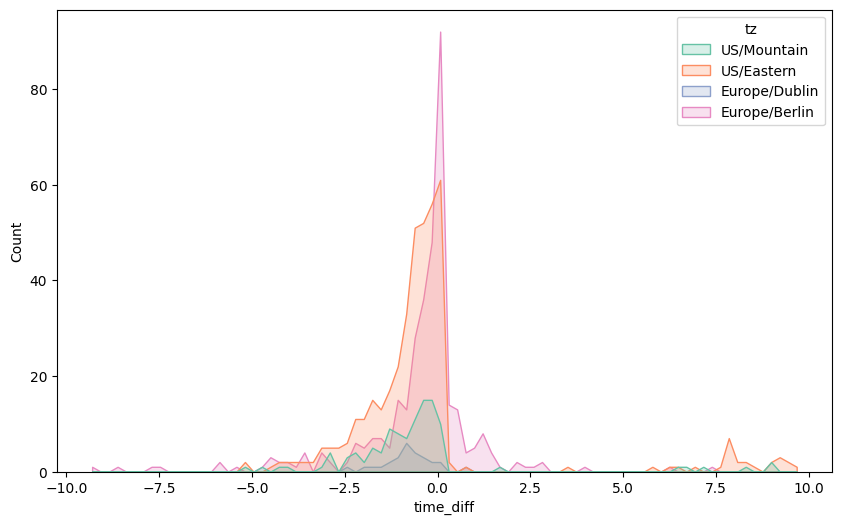

In [12]:
tdax = sns.histplot(data=cat_df, x='time_diff', element='poly', hue='tz', palette='Set2')
tdax.figure.set_size_inches(10, 6)

In [13]:
cat_df['time_diff'].describe()

count    889.000000
mean      -0.434094
std        2.072731
min       -9.420000
25%       -1.100000
50%       -0.390000
75%        0.000000
max        9.790000
Name: time_diff, dtype: float64

In [14]:
# excluded_dates (outliers) = 2 std devs from mean
upper_lim = cat_df['time_diff'].mean() + 2*cat_df['time_diff'].std()
lower_lim = cat_df['time_diff'].mean() - 2*cat_df['time_diff'].std()
excluded_dates = cat_df.loc[(cat_df['time_diff'] > upper_lim) | \
    (cat_df['time_diff'] < lower_lim)]
print('loss: ', f'{np.round((len(excluded_dates)/len(cat_df)*100), 2)}%')

loss:  5.29%


In [15]:
# deleted outliers from dataset: filtered_df
filtered_df = tz_df.loc[tz_df.index.isin(excluded_dates.index) == False]
filtered_df.info(verbose=False)
# print(len(filtered_df))
# filtered_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 2021-01-01 to 2023-10-01
Columns: 26 entries, fromDate to date_cats
dtypes: datetime64[ns](2), float64(13), int64(1), object(10)
memory usage: 177.6+ KB


In [30]:
# fuctions to get mean times on 24hr clock
def mean_angle(deg):
    return degrees(phase(sum(rect(1, radians(d)) for d in deg)/len(deg)))

def mean_time(times):
    if type(times.iloc[0]) != str:
        times = times.dt.strftime('%H:%M:%S')
    t_list = (time.split(':') for time in times if type(time) == str and time != '')
    seconds = ((float(s) + int(m) * 60 + int(h) * 3600) for h, m, s in t_list)
    day = 24 * 60 * 60
    to_angles = [s * 360. / day for s in seconds]
    mean_as_angle = mean_angle(to_angles)
    mean_seconds = mean_as_angle * day / 360.
    if mean_seconds < 0:
        mean_seconds += day
    h, m = divmod(mean_seconds, 3600)
    m, s = divmod(m, 60)
    return '%02i:%02i:%02i' % (h, m, s)

print('mean bedtime', mean_time(filtered_df['bedtime']))
print('mean waketime', mean_time(filtered_df['waketime']))
print('mean asleep', np.round(np.mean(filtered_df['asleep']), 2))
print('mean quality', mean_time(filtered_df['quality']))
print('mean REM', mean_time(filtered_df['REM']))
print('mean deep', mean_time(filtered_df['deep']))

mean bedtime 01:55:38
mean waketime 10:25:57
mean asleep 7.72
mean quality 04:38:18
mean REM 01:48:57
mean deep 02:05:50


In [18]:
# viz_df for plotting
viz_df = filtered_df.copy()
viz_df.head()

,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,sessions,asleep,efficiency,...,sleepHRV,SpO2Avg,SpO2Min,SpO2Max,respAvg,respMin,respMax,REM,tz,date_cats
2021-01-01,2020-12-31,2020-12-31,2020-12-31 01:11:26,2020-12-31 09:30:00,08:18:33,00:18:33,00:18:33,1,8.00,96.3,...,43.0,94.5,90.0,98.0,NaN,NaN,NaN,,US/Mountain,Late 2020
2021-01-02,2021-01-01,2021-01-01,2021-01-01 01:42:00,2021-01-01 09:03:00,07:21:00,00:00:00,00:00:00,1,7.35,100.0,...,46.0,93.7,92.0,96.0,NaN,NaN,NaN,,US/Mountain,Early 2021
2021-01-03,2021-01-01,2021-01-02,2021-01-01 23:11:00,2021-01-02 09:20:00,10:09:00,01:09:00,00:00:00,1,9.00,88.7,...,61.0,92.6,87.0,96.0,NaN,NaN,NaN,,US/Mountain,Early 2021
2021-01-04,2021-01-03,2021-01-03,2021-01-03 00:30:10,2021-01-03 11:00:00,10:29:49,00:00:49,00:00:49,1,10.48,99.9,...,62.0,92.7,85.0,98.0,NaN,NaN,NaN,,US/Mountain,Early 2021
2021-01-05,2021-01-04,2021-01-04,2021-01-04 01:09:00,2021-01-04 09:31:00,08:22:00,00:52:00,00:00:00,1,7.50,89.6,...,61.0,96.5,93.0,99.0,NaN,NaN,NaN,,US/Mountain,Early 2021


In [19]:
print('mean: ', np.mean(viz_df['asleep'].values))
print('standard deviation: ', np.std(viz_df['asleep'].values))
print('var: ', np.var(viz_df['asleep'].values))

mean:  7.716662707838479
standard deviation:  1.5983889313994328
var:  2.5548471760202207


In [20]:
# early bedtime = after 9pm (21:00:00) and before midnight (00:00:00)
# normal bedtime = after midnight (00:00:00) and before 3am (03:00:00)
# late bedtime = after 3am (03:00:00) and before 6am (06:00:00)
# abnormal bedtime = after 6am (06:00:00) and before 9pm (21:00:00)

# change scale to noon starting

def bedtime_conv_and_cat(bed_times):

    new_times = []
    offset_times = []

    bed_times = bed_times.dt.strftime('%H:%M:%S')

    for bt in bed_times:
        h, m, s = bt.split(':')
        h = int(h)
        bthr = h + int(m)/60 + int(s)/3600
        new_times.append(bthr)

        if h >= 12:
            offset_times.append((h-12) + int(m)/60 + int(s)/3600)
        else:
            offset_times.append((h+12) + int(m)/60 + int(s)/3600)

    return new_times, offset_times

In [21]:
# early waketime == from 5am (05:00:00) to 8am (08:00:00)
# normal waketime == from 8am (08:00:00) to 11am (11:00:00)
# late waketime == from 11am (11:00:00) to 2pm (14:00:00)
# abnormal waketime == from 2pm (14:00:00) to 5am (05:00:00)
def waketime_convert(wake_times):

    new_times = []

    wake_times = wake_times.dt.strftime('%H:%M:%S')

    for wt in wake_times:
        if type(wt) != str:
            print('type error: ', wt, type(wt))
            break

        h, m, s = wt.split(':')
        h = int(h)
        wthr = h + int(m)/60 + int(s)/3600
        new_times.append(wthr)

    return new_times

In [22]:
# change time deltas to hours
def time_delta_to_hrs(df):
    df[df == None] = '0:00:00'
    for col in df:
        df[col] = pd.to_timedelta(df[col]).dt.total_seconds() / 3600
    return df


In [23]:
# make tz code
def tz_code(tz):
    if tz == 'US/Mountain':
        return 0
    elif tz == 'US/Eastern':
        return 1
    elif tz == 'Europe/Dublin':
        return 2
    elif tz == 'Europe/Berlin':
        return 3
    else:
        return 4

In [24]:
# created categorical columns for bedtime, waketime, and asleep; offset bedtime
btwt_df = viz_df.loc[:, ['toDate', 'bedtime', 'waketime', 'asleep', 'quality', 'deep', 'REM', 'sleepBPM', 'SpO2Avg', 'tz']]
btwt_df['bedtime'], btwt_df['bedtime_offset'] = bedtime_conv_and_cat(btwt_df['bedtime'])
btwt_df['waketime'] = waketime_convert(btwt_df['waketime'])
btwt_df.loc[:, ['quality', 'deep', 'REM']] = time_delta_to_hrs(btwt_df.loc[:, ['quality', 'deep', 'REM']])
btwt_df['tz_code'] = btwt_df['tz'].apply(tz_code)
btwt_df

,toDate,bedtime,waketime,asleep,quality,deep,REM,sleepBPM,SpO2Avg,tz,bedtime_offset,tz_code
2021-01-01,2020-12-31,1.190556,9.500000,8.00,5.404444,1.75,NaN,63.0,94.5,US/Mountain,13.190556,0
2021-01-02,2021-01-01,1.700000,9.050000,7.35,4.991111,1.225,NaN,66.2,93.7,US/Mountain,13.700000,0
2021-01-03,2021-01-02,23.183333,9.333333,9.00,5.779444,3.0,NaN,63.3,92.6,US/Mountain,11.183333,0
2021-01-04,2021-01-03,0.502778,11.000000,10.48,8.123056,2.246389,NaN,63.0,92.7,US/Mountain,12.502778,0
2021-01-05,2021-01-04,1.150000,9.516667,7.50,5.281389,2.5,NaN,61.2,96.5,US/Mountain,13.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,2023-09-25,1.883333,10.566667,9.14,6.557778,0.983333,2.325,54.0,97.1,Europe/Berlin,13.883333,3
2023-09-27,2023-09-26,6.583333,12.983333,6.70,5.2625,1.425,2.025,56.7,97.2,Europe/Berlin,18.583333,3
2023-09-28,2023-09-27,3.150000,12.000000,8.79,6.738611,1.041667,2.166667,52.8,97.5,Europe/Berlin,15.150000,3
2023-09-30,2023-09-29,0.200000,10.066667,10.31,7.855278,1.083333,2.983333,58.9,95.9,Europe/Berlin,12.200000,3


### Visualizations

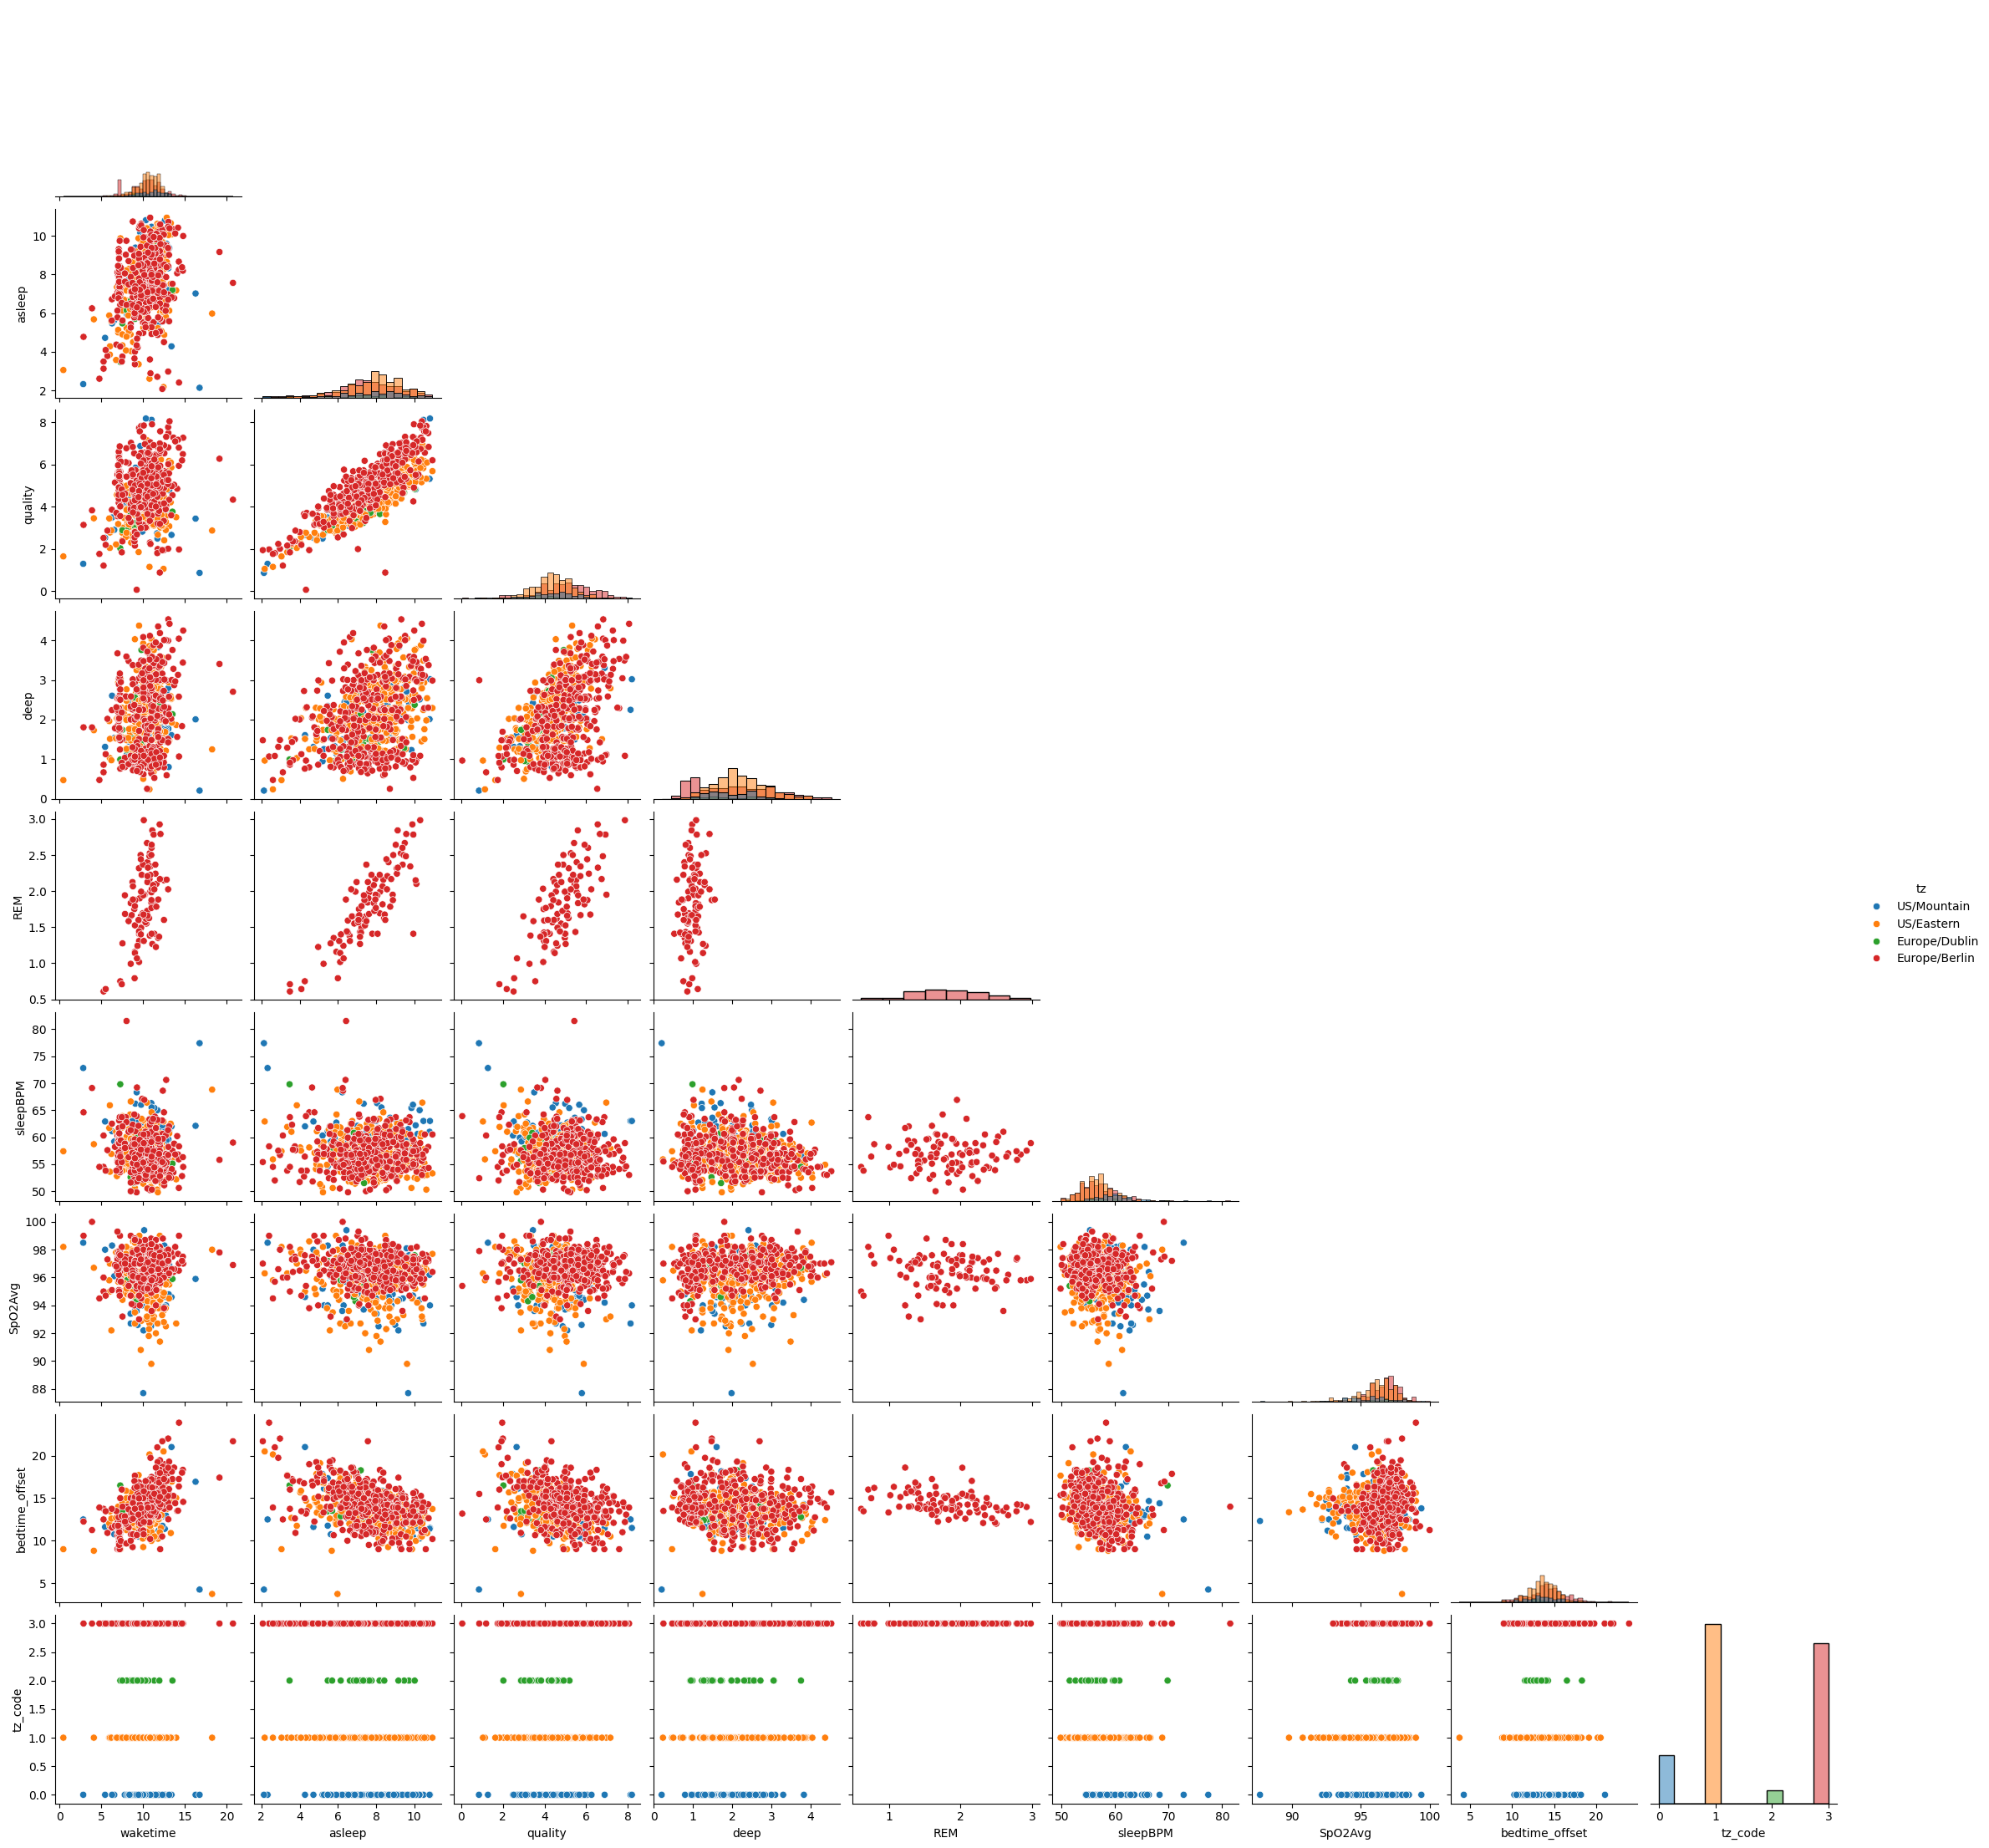

In [25]:
pair_df = btwt_df.drop(columns=['bedtime'])
ax = sns.pairplot(pair_df, hue="tz", diag_kind="hist", corner=True)
plt.show(ax)

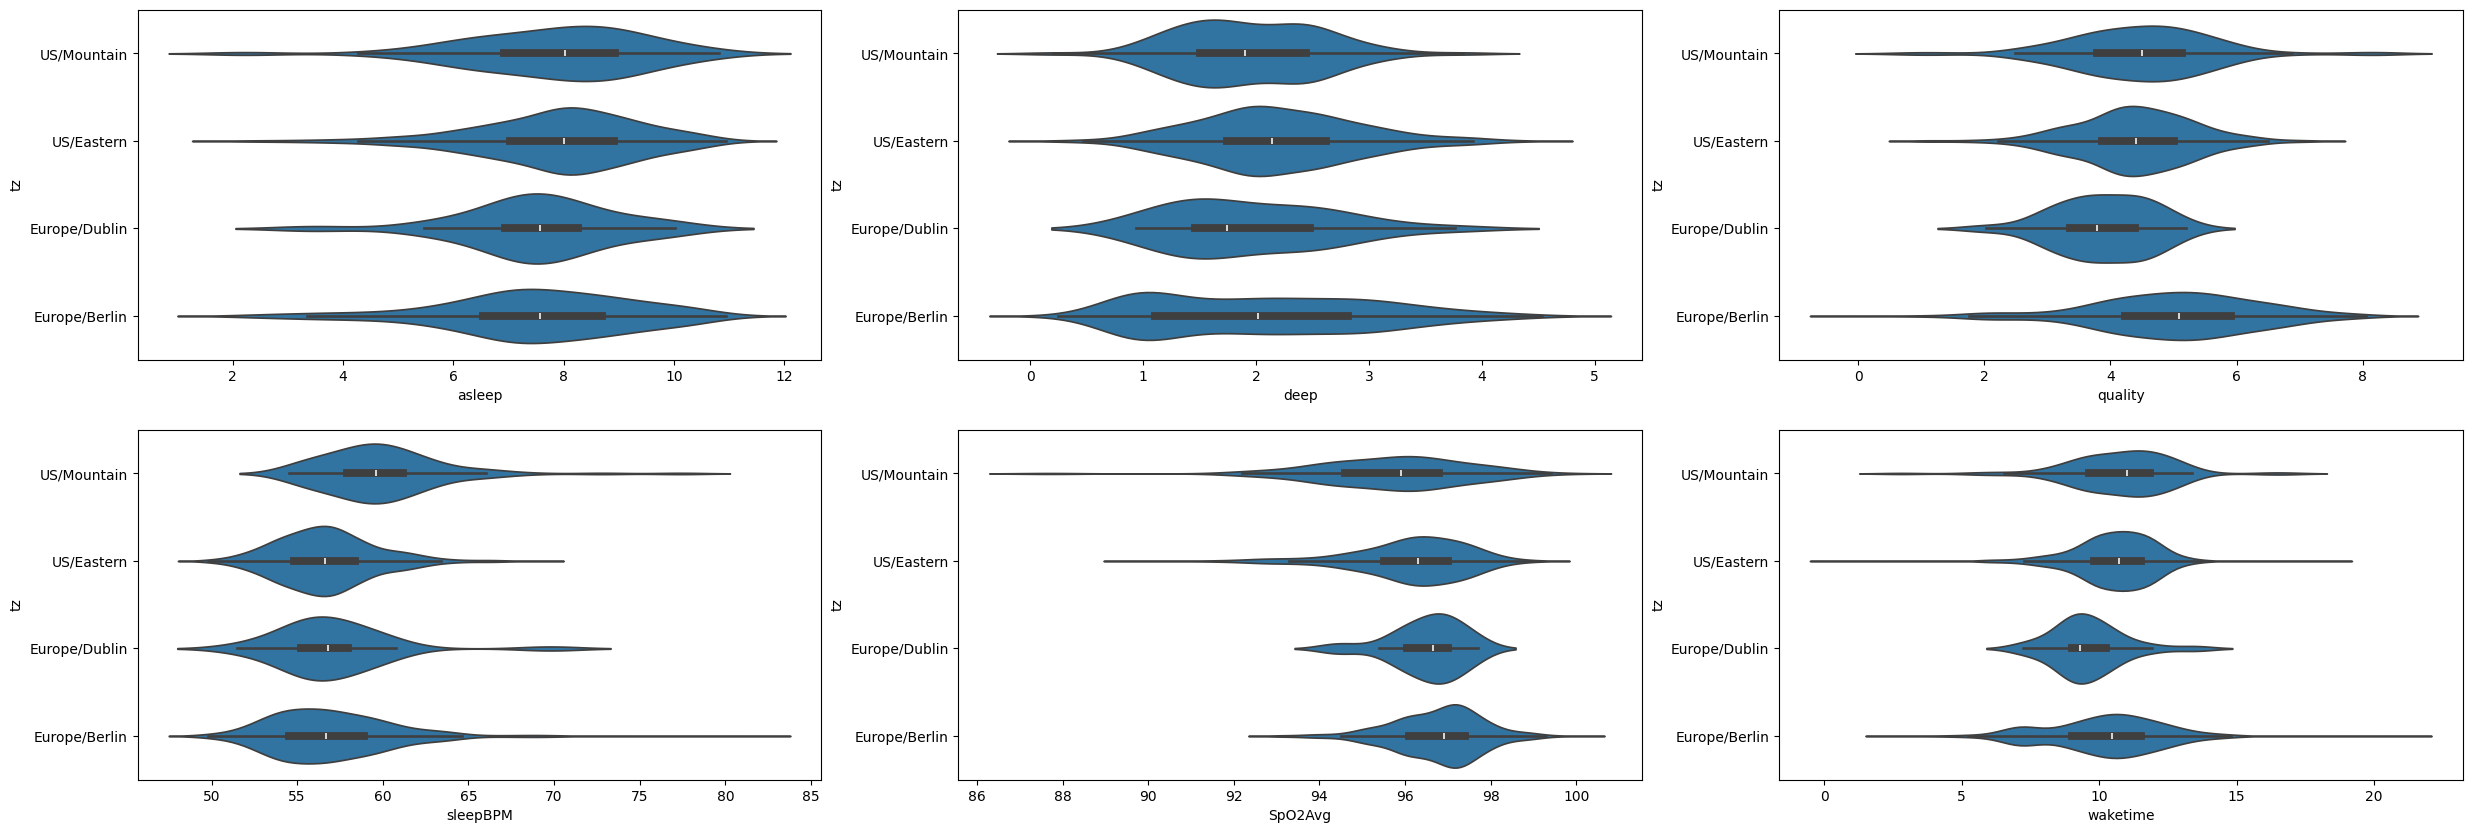

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
a = sns.violinplot(data=pair_df, x="asleep", y="tz", ax=ax[0, 0])
b = sns.violinplot(data=pair_df, x="deep", y="tz", ax=ax[0, 1])
c = sns.violinplot(data=pair_df, x="quality", y="tz", ax=ax[0, 2])
d = sns.violinplot(data=pair_df, x="sleepBPM", y="tz", ax=ax[1, 0])
e = sns.violinplot(data=pair_df, x="SpO2Avg", y="tz", ax=ax[1, 1])
f = sns.violinplot(data=pair_df, x="waketime", y="tz", ax=ax[1, 2])
plt.show(fig)

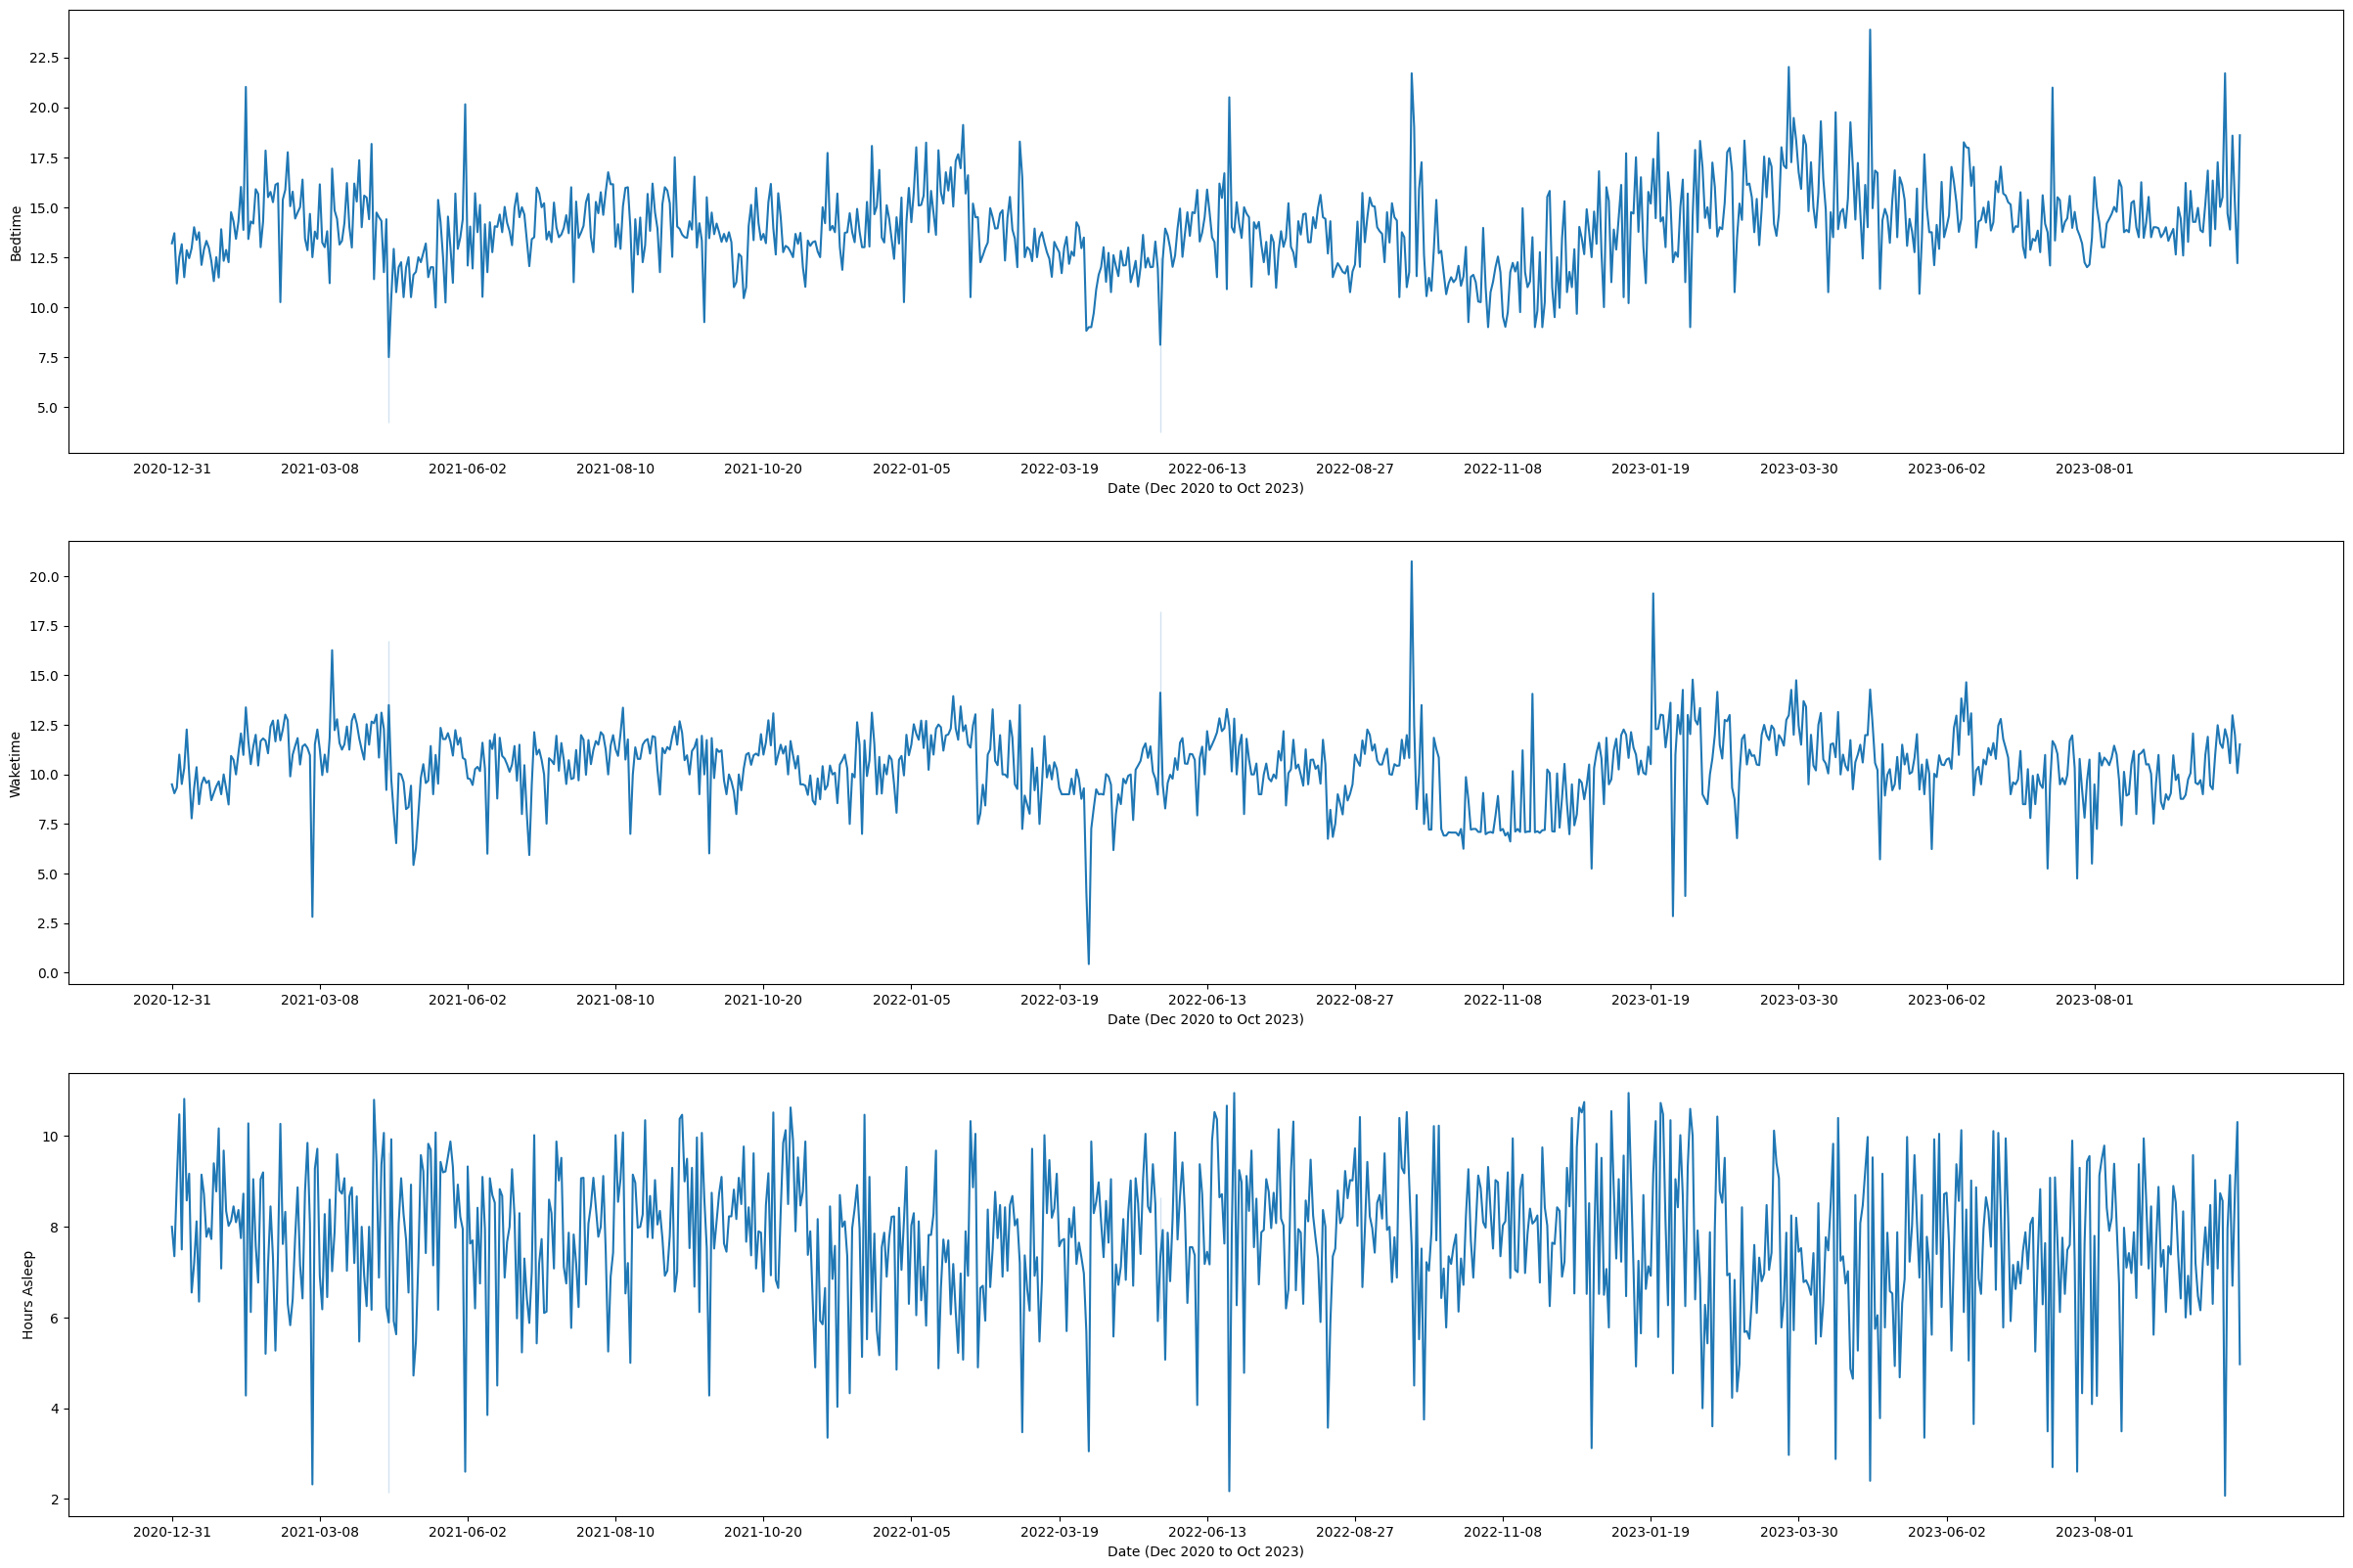

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 20))

a = sns.lineplot(data=btwt_df, x='toDate', y='bedtime_offset', ax=ax1)
ax1.set_ylabel('Bedtime')
ax1.set_xlabel('Date (Dec 2020 to Oct 2023)')
x_ticks = ax1.get_xticks()
x_labels = ax1.get_xticklabels()
new_labels = []
new_ticks = []
for idx, lbl in enumerate(x_labels):
    if idx % 60 == 0:
        new_labels.append(lbl)
        new_ticks.append(x_ticks[idx])
ax1.tick_params(axis='x', bottom=False, top=False)
ax1.set_xticks(new_ticks)
ax1.set_xticklabels(new_labels)

b = sns.lineplot(data=btwt_df, x='toDate', y='waketime', ax=ax2)
ax2.set_ylabel('Waketime')
ax2.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax2.set_xticks(new_ticks)
ax2.set_xticklabels(new_labels)

c = sns.lineplot(data=btwt_df, x='toDate', y='asleep', ax=ax3)
ax3.set_ylabel('Hours Asleep')
ax3.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax3.set_xticks(new_ticks)
ax3.set_xticklabels(new_labels)

plt.show(fig)

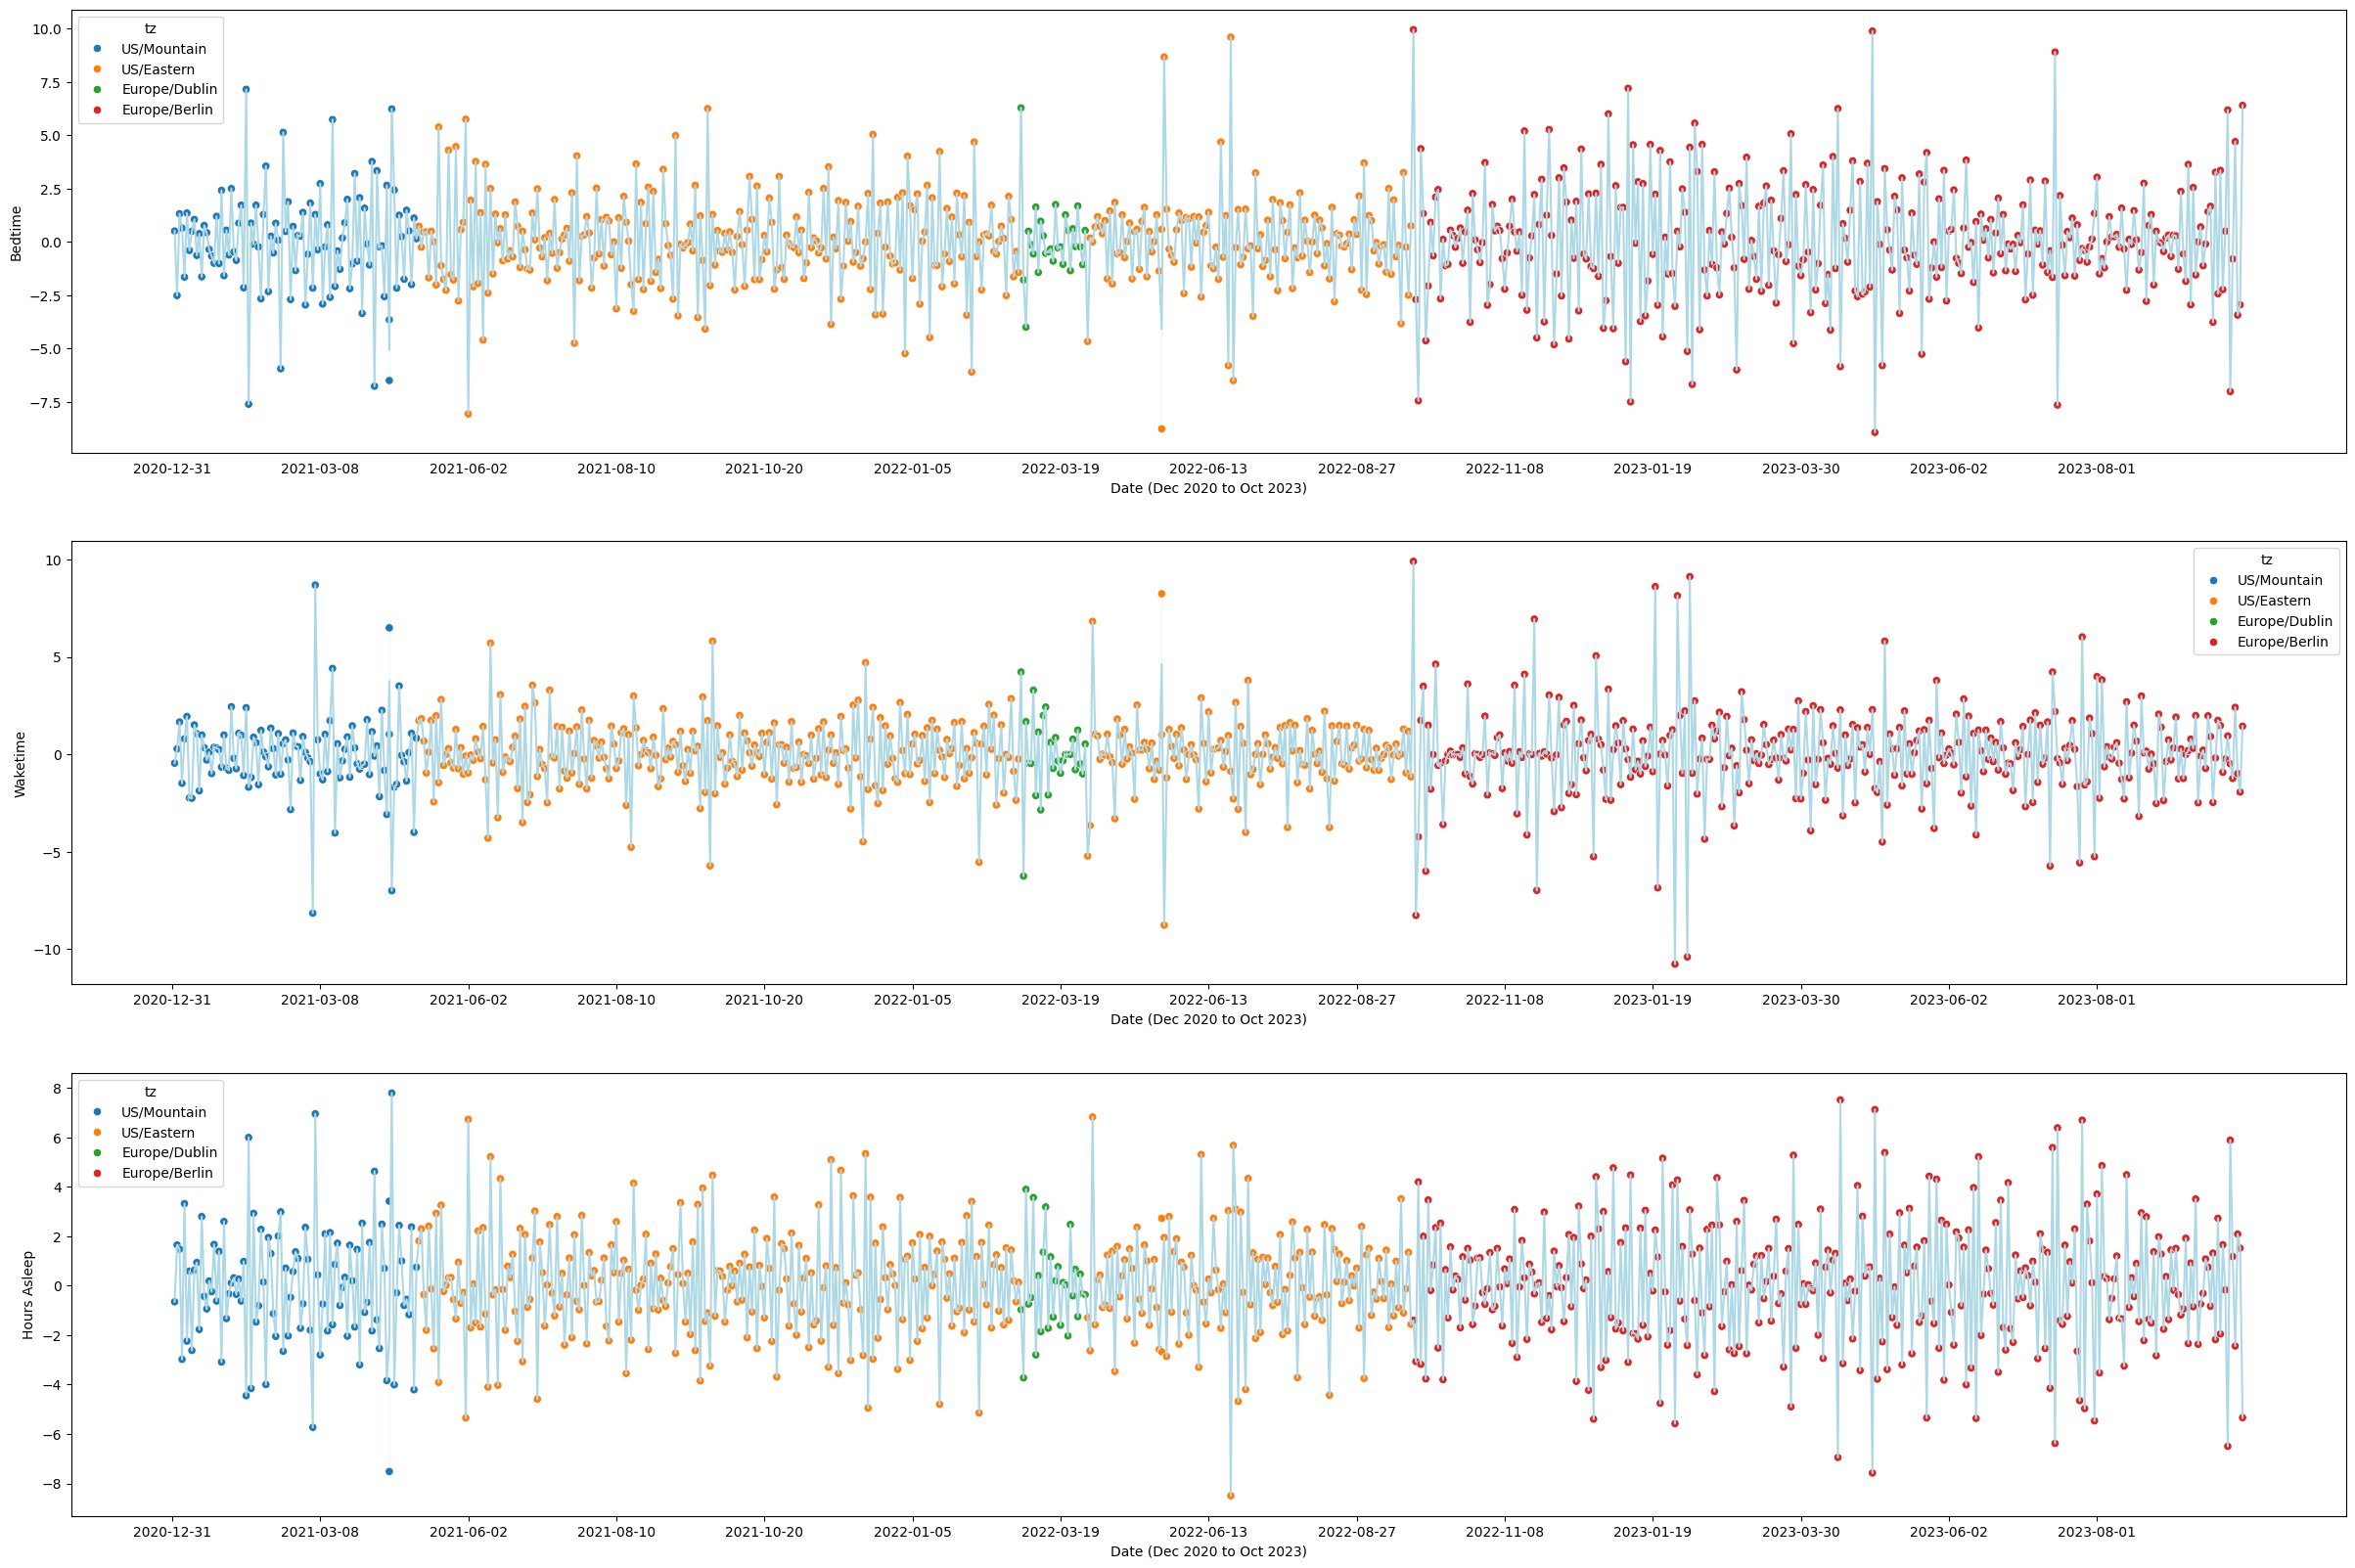

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 20))

a = sns.lineplot(data=btwt_df, x='toDate', y=btwt_df['bedtime_offset'].diff(), ax=ax1, color='lightblue')
a1 = sns.scatterplot(data=btwt_df, x='toDate', y=btwt_df['bedtime_offset'].diff(), ax=ax1, hue='tz')
ax1.set_ylabel('Bedtime')
ax1.set_xlabel('Date (Dec 2020 to Oct 2023)')
x_ticks = ax1.get_xticks()
x_labels = ax1.get_xticklabels()
new_labels = []
new_ticks = []
for idx, lbl in enumerate(x_labels):
    if idx % 60 == 0:
        new_labels.append(lbl)
        new_ticks.append(x_ticks[idx])
ax1.tick_params(axis='x', bottom=False, top=False)
ax1.set_xticks(new_ticks)
ax1.set_xticklabels(new_labels)

b = sns.lineplot(data=btwt_df, x='toDate', y=btwt_df['waketime'].diff(), ax=ax2, color='lightblue')
b1 = sns.scatterplot(data=btwt_df, x='toDate', y=btwt_df['waketime'].diff(), ax=ax2, hue='tz')
ax2.set_ylabel('Waketime')
ax2.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax2.set_xticks(new_ticks)
ax2.set_xticklabels(new_labels)

c = sns.lineplot(data=btwt_df, x='toDate', y=btwt_df['asleep'].diff(), ax=ax3, color='lightblue')
c1 = sns.scatterplot(data=btwt_df, x='toDate', y=btwt_df['asleep'].diff(), ax=ax3, hue='tz')
ax3.set_ylabel('Hours Asleep')
ax3.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax3.set_xticks(new_ticks)
ax3.set_xticklabels(new_labels)

plt.show(fig)

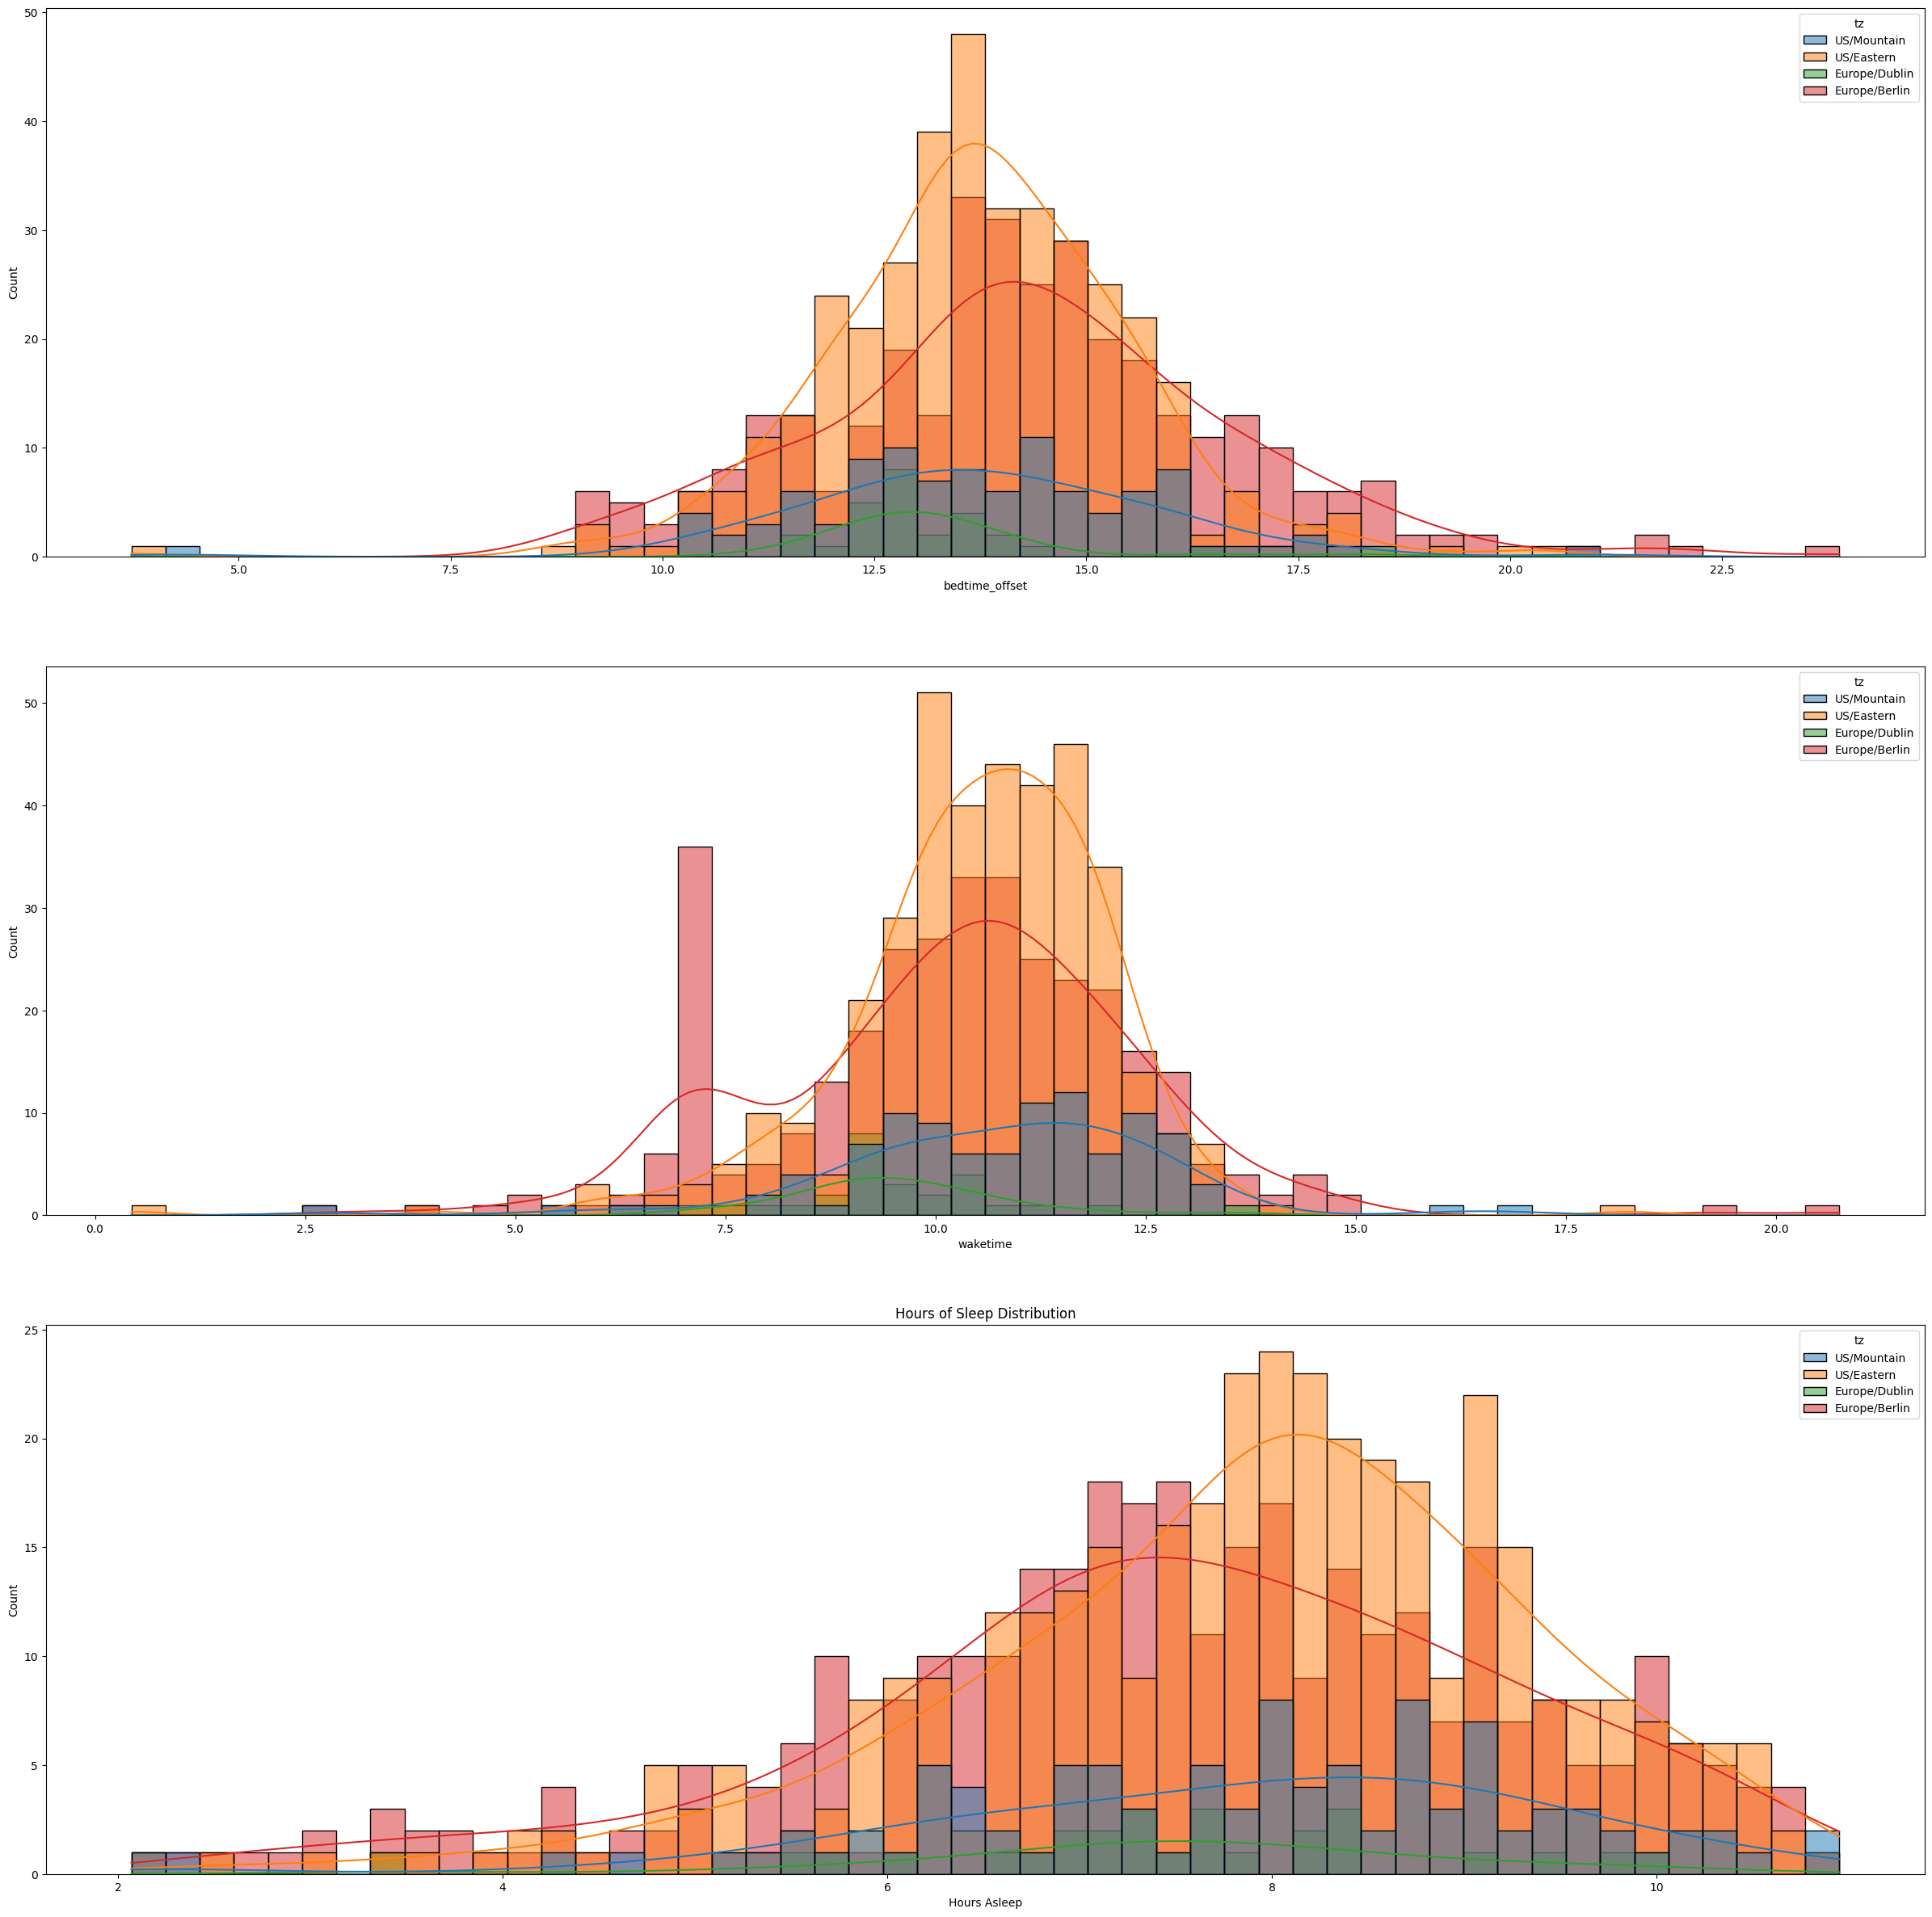

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 30))

a = sns.histplot(data=btwt_df, x='bedtime_offset', hue='tz', ax=ax1, kde=True, bins=50)
b = sns.histplot(data=btwt_df, x='waketime', hue='tz', ax=ax2, kde=True, bins=50)
c = sns.histplot(data=btwt_df, x='asleep', hue='tz', ax=ax3, kde=True, bins=50)

ax3.set_xlabel('Hours Asleep')
ax3.set_title('Hours of Sleep Distribution')

plt.show(fig)